# BE LINEAR REGRESSION
*By Lao Will and Taupiac Theo*

In [1]:
### IMPORT

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

# Exercice 1

*Nous souhaitons quantifier en temps reel et automatiquement le risque de  collision d'un drone avec des objets environnants. Pour y arriver, nous avons embarque 18 capteurs sur le drone en phase de test et estime a plusieurs instants son risque de collision. Un total de 67 observations a ete enregistre dans le fichier 'Observations_1.csv'.*

*Nous allons evaluer dans cet exercice si ces observations nous permettent de mettre en lien les données capteurs avec le niveau de risque.*

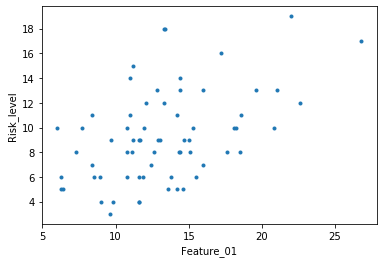

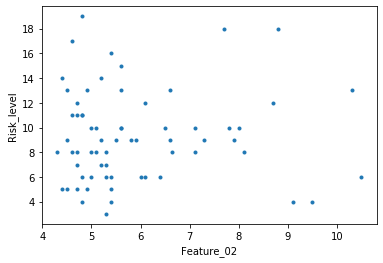

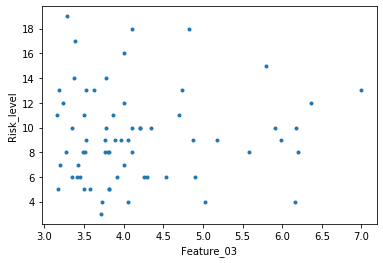

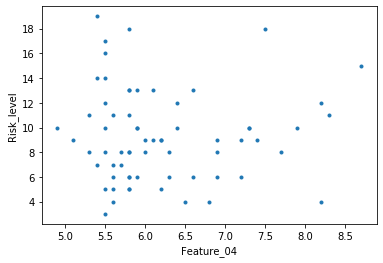

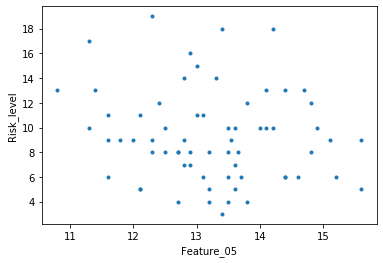

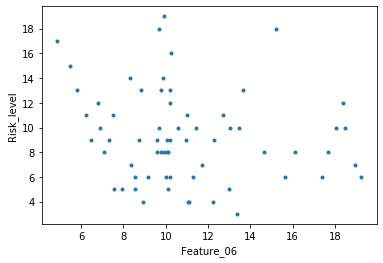

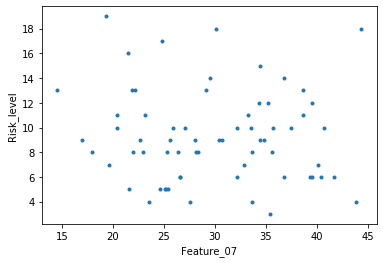

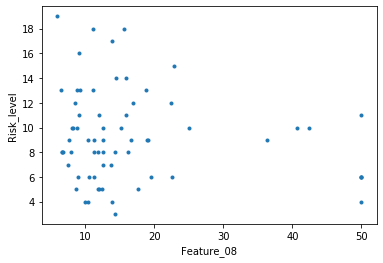

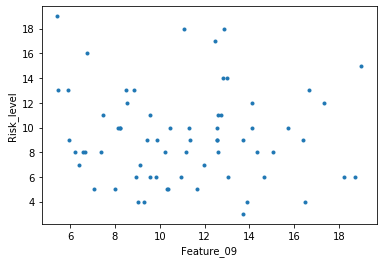

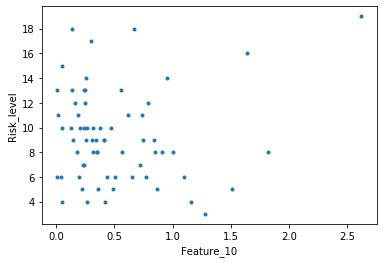

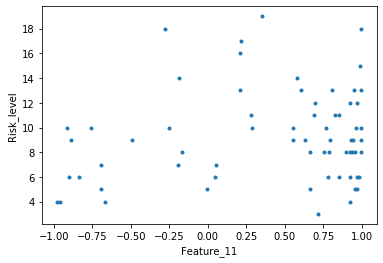

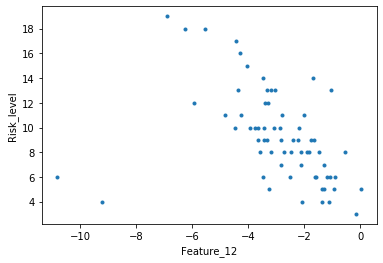

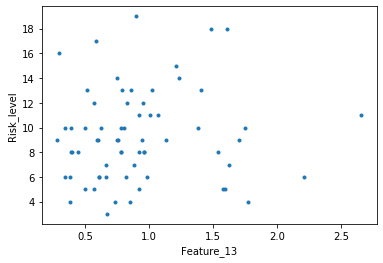

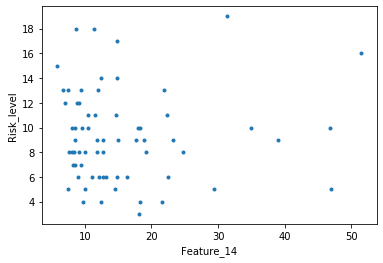

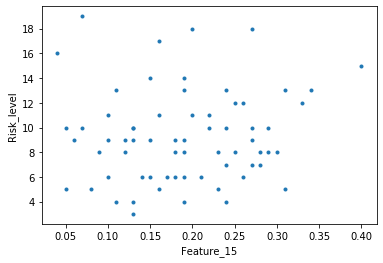

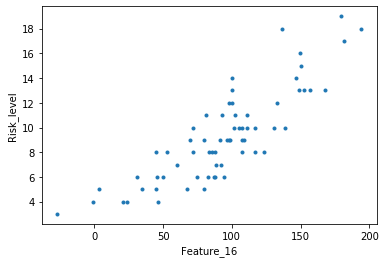

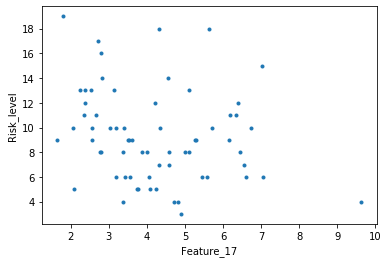

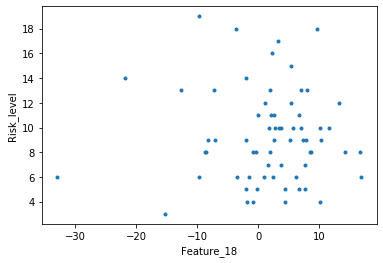

In [2]:
# Figure: Risk_level = f(Feature_i)
dataframe=pd.read_csv("./Observations_1.csv",sep=';')

listColNames=list(dataframe.columns)

XY=dataframe.values
ColNb_Y=listColNames.index('Risk_level')

Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only

for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Risk_level')
  plt.show()

<div class='alert alert-info'>
<b>QUESTION 1</b> : <br>
Observez les donnees unes par unes. Est-ce que vous identifiez visuellement des liens entre 
certaines variables et la variable 'Risk_level'. Si oui, lesquels ?
</div>

<div class=' alert alert-warning '>
It seems that there is a visible link between $Risk\_level$ and :
- $Feature\_12$ : Linear negative correlation
- $Feature\_16$ : Linear positive correlation

- Also a little bit with the $Feature\_01$ 

<div class='alert alert-info'>
<b>QUESTION 2</b> : <br>
On se demande si il est possible de predire le niveau de 'Risk_level' à partir d'une seule des variables 'Feature_01', 'Feature_07' ou 'Feature_16'. 
    
<b>QUESTION 2.1</b> : <br>
Effectuez une regression lineaire simple entre 'Risk_level' et chacune de ces  variables.  Toutes les donnees seront utilisees. Evaluez alors la qualité des predictions sur toutes les donnees l'aide de la moyenne de l'erreur de prediction au carre (MSE). Quel est le risque potentiel en utilisant cette stratégie de validation de l'apprentissage ? 
</div>

In [3]:
# A quick look to the data structure

dataframe.head()
# dataframe.info()
# dataframe.describe()

# %matplotlib inline
# import matplotlib.pyplot as plt
# dataframe.hist(bins=50, figsize=(20,15))
# plt.show()

,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Risk_level
0,11.6,6.4,4.3,7.2,14.4,19.26,39.32,50.00,13.040000,0.20,0.0440,-1.578984,2.209,9.02,0.26,94.285053,3.56,16.91,6
1,15.5,10.5,4.9,6.9,13.7,8.57,36.78,22.57,18.713333,0.51,0.8501,-2.497499,0.339,22.43,0.10,86.766527,7.06,-3.47,6
2,15.3,6.5,4.2,6.4,13.6,13.48,25.90,8.25,8.246667,0.27,0.9629,-3.638758,0.339,17.94,0.13,107.336147,3.20,10.05,10
3,13.4,7.7,4.1,5.8,14.2,15.23,44.36,11.09,11.093333,0.67,-0.2756,-6.273760,1.611,11.38,0.20,136.516384,4.33,-3.62,18
4,16.0,5.2,3.2,5.7,12.8,8.37,19.62,7.44,6.386667,0.24,-0.6928,-2.096575,0.659,8.56,0.27,88.774469,4.57,1.56,7


<div class=' alert alert-warning '>

A quick look to the data structure:<br>
$dataframe$ contains: 
- 66 observations 
- within each observation, 18 $Feature\_i$ and 1 $Risk\_level$<br>

There is no value missing, no data cleaning is needed on this aspect

In [4]:
# All the values are used, no need to do a partition a train_set and a test_set
# Drop 'Risk_level' for the training set
dataframe_X_train = dataframe.drop("Risk_level", axis=1) 
dataframe_Y_train = dataframe["Risk_level"].copy()

# Train for a linear regression and predict for each feature of 'dataframe_X_train'
# The results of the prediction are stored in 'lin_reg_result'
lin_reg = LinearRegression()
listColNames_X_train = list(dataframe_X_train.columns)
lin_reg_fit    = [] # Store the linear regression for each feature
lin_reg_result = [] 

for Col in range(len(listColNames_X_train)):
    # Reshape to have a 2D array
    col_X_train = dataframe_X_train.values[:,Col].reshape(-1,1)
    lin_reg_fit.append(lin_reg.fit(col_X_train, dataframe_Y_train[:]))
    lin_reg_result.append(lin_reg_fit[Col].predict(col_X_train))
    
print(lin_reg_result[15])

[ 9.33512178  8.80213591 10.26030949 12.32888683  8.94447824  9.58719664
 11.41115277  8.58517718  7.76467174  2.8982108   9.20988866  8.39465822
 11.91748888 14.56759535  9.74642291 13.22839831  8.85304041  7.75607002
  5.86801136 13.02923746  6.39934411  6.21587175 13.26279222  9.75836011
 15.37301088 10.10992098  9.59286708  9.15454262  6.89184306  8.50725671
  7.57271013  5.83045821  4.35352041  9.24782574 10.9373473  15.50216156
  9.84245439  8.88325699  2.57866841  8.72439652  9.49876238  5.11015856
 13.79647891  9.63028096  9.7444274  10.25037434  9.88420276  7.40740026
 12.08663296  4.13712816  8.29358591  0.73104723 16.42658138  8.29389523
  5.95544406 13.32021488 12.46274851  5.82036796 10.36494604  4.86114986
 10.54293517  7.93977133 10.94888608 13.46591434 10.52523302 10.27467017]


In [5]:
# All the values are used, no need to do a partition a train_set and a test_set
# Drop 'Risk_level' for the training set
dataframe_X_train = dataframe[['Feature_01', 'Feature_07', 'Feature_16']]
dataframe_Y_train = dataframe["Risk_level"].copy()

# Train for a linear regression and predict for 'Feature_01', 'Feature_07' and 'Feature_16'
# The results of the prediction are stored in 'lin_reg_result'
listColNames_X_train = list(dataframe_X_train.columns)
nbCol_X_train = len(listColNames_X_train)

lin_reg = LinearRegression()
lin_reg_fit    = [] # Store the linear regression for each feature
lin_reg_result = [] 

for Col in range(nbCol_X_train):
    # Reshape to have a 2D array
    col_X_train = dataframe_X_train.values[:,Col].reshape(-1,1)
    lin_reg_fit.append(lin_reg.fit(col_X_train, dataframe_Y_train[:]))
    lin_reg_result.append(lin_reg_fit[Col].predict(col_X_train))

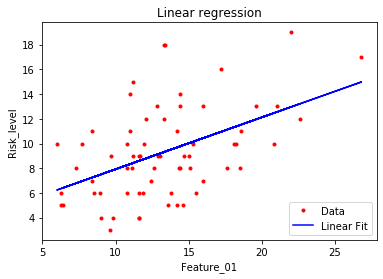

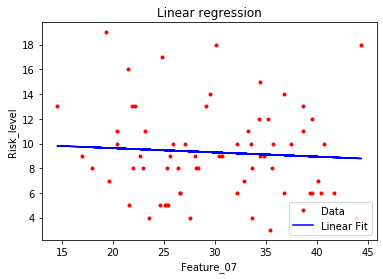

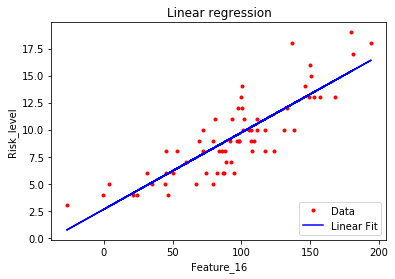

In [6]:
# Plot the figure linear regression for 'Feature_01', 'Feature_07' and 'Feature_16'

XY_train = dataframe_X_train.values
Y_predict = np.transpose(lin_reg_result)

for Col in range(nbCol_X_train):
    plt.plot(XY_train[:,Col],Y[:],'r.') # Y was defined in the very first cell
    plt.xlabel(listColNames_X_train[Col])
    plt.ylabel('Risk_level')
    plt.plot(XY_train[:,Col], Y_predict[:,Col], 'b-')
    plt.legend(('Data', 'Linear Fit'), loc='lower right')
    plt.title('Linear regression')
    plt.show()

In [7]:
# Evaluate the quality of the linear regression by computing the MSE 
# for each feature of 'dataframe'

lin_reg_rmse = []

for Col in range(nbCol_X_train):
    lin_reg_mse = mean_squared_error(Y, Y_predict[:,Col])
    lin_reg_rmse.append(np.sqrt(lin_reg_mse))
    print("The RMSE between {} and its linear prediction is {}".format(listColNames_X_train[Col], 
                                                                lin_reg_rmse[Col]))

The RMSE between Feature_01 and its linear prediction is 3.237425504296197
The RMSE between Feature_07 and its linear prediction is 3.6751770494334273
The RMSE between Feature_16 and its linear prediction is 1.957893436980938


<div class=' alert alert-warning '>

Maybe the linear regression of the $Feature\_1$ is bad because of the two outliers. We could do the linear regression on this feature again after deleting them from the training dataset.

The potential risk of using this validation strategy is to have good predictions on the dataset but bad results when trying to do predictions. It will be an issue of `overfitting`.

<div class='alert alert-info'>
<b>QUESTION 2.2</b> : <br>
Evaluez a quel point les predictions sont stables a l'aide d'une methode de validation croisee de type 4-folds.
</div>

In [8]:
# 4-folds cross validation for each feature of 'dataframe'

lin_reg_rmse_scores = []

for Col in range(nbCol_X_train):
    col_X_train = dataframe_X_train.values[:,Col].reshape(-1,1)
    scores = cross_val_score(lin_reg_fit[Col], col_X_train, Y,
                         scoring="neg_mean_squared_error", cv=4)
    lin_reg_rmse_scores.append(np.sqrt(-scores))
  
# Display the RMSE, Mean and Standard deviation for the 4-cross validation
mean_and_std = [[lin_reg_rmse_scores[i].mean(), lin_reg_rmse_scores[i].std()] 
                for i in range(nbCol_X_train)]

lin_reg_rmse_cross_val = np.concatenate((lin_reg_rmse_scores, mean_and_std), axis=1)

cross_val_display = pd.DataFrame(lin_reg_rmse_cross_val, 
                                 columns = ['RMSE 1' , 'RMSE 2', 'RMSE 3', 
                                            'RMSE 4', 'Mean', 'Standard deviation'], 
                                 index   = [listColNames_X_train])

cross_val_display

,RMSE 1,RMSE 2,RMSE 3,RMSE 4,Mean,Standard deviation
Feature_01,3.362882,3.334965,2.779619,3.687548,3.291253,0.326290
Feature_07,3.901998,4.121149,3.569943,3.985423,3.894628,0.203120
Feature_16,2.606699,2.059913,1.482784,1.760088,1.977371,0.416742


<div class=' alert alert-warning '>

For the $Feature\_01$ and $Feature\_07$:
- The mean of the four RMSE is high, more than 30% of the real values in Y. This means that the `predicted values are not good`.
- Actually, even visually, the linear regression does not look accurate.

For $Feature\_16$, the mean of the four RMSE in $1.977371$. It is better and visually, `a linear regression is relevant`.

For $Feature\_01$, $Feature\_07$ and $Feature\_16$, the standard deviation is higher than 20%, even 41% for $Feature\_16$
The linear regression is `not stable` because it predicts very different values depending on which of the four folds the cross validation is made.

<div class='alert alert-info'>
<b>QUESTION 2.3</b> : <br>
Peut-on enfin dire si on observe une relation significative entre 'Risk_level' et (independament) 'Feature_01', 'Feature_07' ou bien 'Feature_16'. On peut le valider a l'aide d'un test d'hypothese dont on decrira la procedure.
</div>

<div class=' alert alert-warning '>

To verify whether there is a link between $Risk\_level$ and $Feature\_01$, $Feature\_07$ or $Feature\_16$, we should do a `test to analyze the variance of the linear regression` (2.1.5 in CoursModeleLineaire2019)

But before this, we should have a look over R^2.
We compute first :
- Sum of Squares Erreur : SST = (n − 1)s2
- Sum of Squares Regression : SSR = (n − 1)s2xy/s2x 

Then, we compute the value of R^2 = SSR/SST, which explain the proportion of explication of the variability.

For doing a test around these results, we could use a similar method that ANOVA with Fisher Stastistics.
We set the hypothesis of the test : H0: β1 = β2 = 0 against H1 :∃j : βj  ̸=0.

We choose F = MSB/MSW (Fisher Statistics) and we compute p (survival function), function of F. Then, the decision is H0 rejected (regression ok) if p < alpha we set.


<div class='alert alert-info'>
<b>QUESTION 3</b> : <br>
On s'interesse maintenant au lien entre la variable 'Risk_level' et 'Feature_12'. On peut remarquer que ces donnees contiennent deux valeurs aberrantes.

<b>QUESTION 3.1</b> : <br>
Definissez une procedure pour detecter automatiquement deux donnees aberrantes dans un jeu de donnees. 
</div>

<div class=' alert alert-warning '>
From the classes, we see that we can compute the Cook distance for each set of data in which we exclude one variable.

In [9]:
col_X = dataframe['Feature_12'].values
col_Y = dataframe['Risk_level'].values
n = len(col_X)

lin_reg.fit(col_X[:, np.newaxis], col_Y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
s2=np.sum((col_Y-lin_reg.predict(col_X[:, np.newaxis]))*(col_Y-lin_reg.predict(col_X[:, np.newaxis])))/(n-2)

list_of_D = []
for i in range(n):
  x_del_i=np.delete(col_X ,i)
  y_del_i=np.delete(col_Y,i) 
  
  lin_reg.fit(x_del_i[:, np.newaxis], y_del_i)
  #print('variable supprimee='+str(i))
  #print('residus ='+str(col_Y-lin_reg.predict(col_X[:, np.newaxis]))) 
  sum_squared_error = np.sum((col_Y-lin_reg.predict(col_X[:, np.newaxis]))*(col_Y-lin_reg.predict(col_X[:, np.newaxis])))
  list_of_D += [sum_squared_error/(2.*s2)]
  #print('D('+str(i)+')='+str(sum_squared_error/(2.*s2)))

nb_abn_data = 2 #we choose the number of outliers we want to find
index = []
for k in range (nb_abn_data):
    index += [list_of_D.index(max(list_of_D))]
    list_of_D[index[k]] = 0
    print("Index {} of Feature_12 with the value ".format(index[k]), end="")
    print("{} is an outlier.".format(col_X[index[k]]))    


Index 29 of Feature_12 with the value -10.82853664 is an outlier.
Index 49 of Feature_12 with the value -9.21027242 is an outlier.


<div class=' alert alert-warning '>

Otherwise, three easy to implement methods can be used to automatically detect outliers in a dataset:
- `Z-score method`: describes a data point in terms of its relationship to the *mean* and *standard deviation* of a group of points. If the Z-score is higher than a defined threhold, the point is deemed as an outlier<br>
<br>
- `Modified Z-score method`: Compared to the Z-score method, it uses the *median* and *Median Absolute Deviation* instead of the *mean* and *standard deviation*. This makes it more robust because the *mean* and *standard* deviation are highly affected by outliers, contrary to the *mean* and the *Median Absolute Deviation*<br>
<br>
- `Interquartile range (IQR)`: The interquartile range is the range between the first and the third quartiles (the edges of the whisker box). Any data point that fell outside of the whiskers are deemed "outliers". These whiskers represent 1.5 times the IQR below the first quartile and 1.5 times the IQR above the third quartile.

In [10]:
# Detection of outliers with the Interquartile range (IQR) method

def outliers_iqr(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return [lower_bound, upper_bound, np.where((data > upper_bound) | (data < lower_bound))]

col_X_train = dataframe['Feature_12'].values
outliers_Feature_12 = outliers_iqr(col_X_train)

print("The Interquartile range method of detecting outliers is used\n")
print("The lower bound of the whisker box is {}.".format(outliers_Feature_12[0]))
print("The upper bound of the whisker box is {}.\n".format(outliers_Feature_12[1]))
for outlier in outliers_Feature_12[2][0]:
    print("Index {} of Feature_12 with the value ".format(outlier), end="")
    print("{} is an outlier.".format(col_X_train[outlier]))

# print(col_X_train)
# print(outliers_Feature_12)

The Interquartile range method of detecting outliers is used

The lower bound of the whisker box is -6.567715063750001.
The upper bound of the whisker box is 1.2740993262500002.

Index 24 of Feature_12 with the value -6.89374695 is an outlier.
Index 29 of Feature_12 with the value -10.82853664 is an outlier.
Index 49 of Feature_12 with the value -9.21027242 is an outlier.


<div class='alert alert-info'>
<b>QUESTION 3.2</b> : <br>
Nous supprimerons dans la suite de cet exercice les deux observations qui sont aberrantes sur la variable 'Feature_12'. Comment auriez-vous traite ces observations si vous aviez absolument voulu preserver l'information qu'elles contiennent dans les autres variables ?
</div>

<div class=' alert alert-warning '>

If we wanted to keep those observations, we could have `replaced them by the median`. Therefore, these outliers are brought back inside the whisker box without changing too much the IQR and the median. <br>
The mean should not be used because it was heavily affected by the outliers.

In [11]:
# We suppress the abnormal values and create a new dataframe:

dataframe.drop([29,49], inplace=True)

<div class='alert alert-info'>
<b>QUESTION 4</b> : <br>
Une fois les deux observations aberrantes de 'Feature_12' supprimees, on souhaite selectionner les variables de 'X' qui permettent de prédire au mieux 'Risk_level' a l'aide de la regression multiple regularisee.
    
<b>QUESTION 4.1</b> : <br>
Quelle strategie vous semble la plus appropriee pour selectionner les variables les plus pertinentes ? Quel pretraitement allez-vous de meme effectuer sur les donnees.
</div>

<div class=' alert alert-warning '>

In order to choose the most relevant variables for a *Regularized Multiple Regression*, three methods can be used:
- Selection (forward)
- Elimination (backward)
- Mixte (stepwise)<br>

We could have also used:
- Grid search
- Randomized search
- Ensemble methods<br>

But as we will use LASSO from sklearn, it already gives importance of the variables with its coefficients.

Then, we will also  reduct and centralize the data before to use the regression.

<div class='alert alert-info'>
<b>QUESTION 4.2</b> : <br>
Effectuez la procedure de selection des variables optimales en parametrant a la main le poids entre la qualite de prediction et le niveau de regularisation.
</div>

In [12]:
### SCALE OF THE DATA

scaler = MinMaxScaler()

X = dataframe.drop("Risk_level", axis=1) 
y = dataframe['Risk_level'].values

X_scaled = scaler.fit_transform(X)

#print(X_scaled)

EDIT : we could have used 'normalize' of the lasso fonction to do this.

In [13]:
n_SPLT = 7

kf = KFold(n_splits=n_SPLT)

for alpha in [0.001,0.01,0.1,1.,10.]:
    sum_r2_scores=0.
    for train, test in kf.split(X):
        X_train=X_scaled[train]
        y_train=y[train]
        X_test=X_scaled[test]
        y_test=y[test]

        lasso_regressor = Lasso(alpha=alpha)
        lasso_regressor.fit(X_train, y_train)

        y_pred_lasso = lasso_regressor.predict(X_test)
        r2_score_lasso = r2_score(y_test, y_pred_lasso)
    
        sum_r2_scores+=r2_score_lasso
    print(alpha," total: ",sum_r2_scores)

    
# alpha = 0,01 seems optimal    
print(" ---------------------------------- ")
list_score = []
for alpha in np.linspace(0.01,0.2,20):
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)

    y_pred_lasso = lasso_regressor.predict(X_test)
    r2_score_lasso = r2_score(y_test, y_pred_lasso)
    list_score +=[r2_score_lasso]
    
    print(alpha," total: ",r2_score_lasso)


0.001  total:  4.642120385880441
0.01  total:  4.968825234658508
0.1  total:  5.144499336326271
1.0  total:  -0.6162800843225342
10.0  total:  -0.6162800843225342
 ---------------------------------- 
0.01  total:  0.795126972679336
0.02  total:  0.8038087375761316
0.03  total:  0.8311354119119924
0.04  total:  0.8405362583434821
0.05  total:  0.8448137801343361
0.060000000000000005  total:  0.8520037686985753
0.06999999999999999  total:  0.8576724314050673
0.08  total:  0.8607643055401014
0.09  total:  0.8572265835698549
0.09999999999999999  total:  0.8516297488006195
0.11  total:  0.8486870049554842
0.12  total:  0.8452231631465983
0.13  total:  0.8411459603882655
0.14  total:  0.8364553830586821
0.15000000000000002  total:  0.8311514147980056
0.16  total:  0.8252340556062365
0.17  total:  0.8187033054833743
0.18000000000000002  total:  0.8115591644294196
0.19  total:  0.8038016324443714
0.2  total:  0.7954307095282305


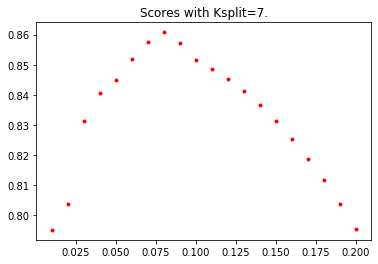

In [14]:
fig = plt.figure()
plt.plot(np.linspace(0.01,0.2,20),list_score, 'r.')
plt.title('Scores with Ksplit='+str(n_SPLT)+'.')
plt.show()

<div class=' alert alert-warning '>

By this quick test (just sampling data in two parts), we choose alpha = 0.08 (score of with Ksplit = 7) in ordre to get a good quality of prediction and a good regularisation level.

In [15]:
alpha = 0.08

lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print(lasso_regressor.coef_)

[ 0.4099718  -0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.          0.          0.         -5.58877106
  0.         -0.          0.         10.36395159 -0.         -0.        ]


<div class=' alert alert-warning '>

We see that LASSO keeps the $Feature\_01$, $Feature\_12$, $Feature\_16$. 

Finally, we verify the first analysis of the TD, that is $Feature\_01$,$Feature\_12$, $Feature\_16$ provide information to explain $Risk\_level$.

However, we choose manually kfold and alpha to get 3 variables (see question below).

With all the other tests of alpha and kfold, these 3 features always provide big parts of information, but some features also help sometimes to explain $Risk\_level$.

<div class='alert alert-info'>
<b>QUESTION 4.3</b> : <br>
Effectuez la procedure automatique de parametrisation de ce poids, de sorte a ce q'un maximum de trois variables soit typiquement selectionne et que la qualite de prediction soit optimale. <br>
Quelle methode de validation croisee vous semble la plus raisonnable ici ? La selection des variables est-elle stable ?
</div>

<div class=' alert alert-warning '>

We got 3 variables and a optimal prediction score with alpha = 0.08 and kfold = 7.

Here, we prefered use a kfold methode than a LOO because the data are easy enough to use, and standardized.

The selection of variable is quite stable, because the three features mentionned above are always present, but the number of variable could change if we change kfold and alpha

# Exercice 2

*Nous souhaitons maintenant evaluer si un nouveau traitement a un effet significatif sur l'efficacite d'un moteur en fonction de son age.*

In [19]:
dataframe_2 = pd.read_csv("./Observations_2.csv",sep=' ')

In [21]:
dataframe_2.head()

,Treatment,Age,Efficiency
0,Standard,3.9479,3.2224
1,Standard,1.7838,1.5127
2,Standard,7.4415,4.3736
3,Standard,8.5625,5.2151
4,Standard,9.8002,5.4256


<div class='alert alert-info'>
<b>QUESTION 1</b> : <br>
Lisez le fichier Observations_2.csv qui contient les donnees, traitez les et representez les avec :<br>
-> 'Age' en abscisse<br>
-> 'Efficiency' en ordonnee<br>
-> Les observations avec le traitement standard (Standard) en bleu<br>
-> Les observations avec le nouveau traitement (Tested) en rouge.<br>
A la vue du graphe, vous semble-t-il y avoir un effet ?
</div>

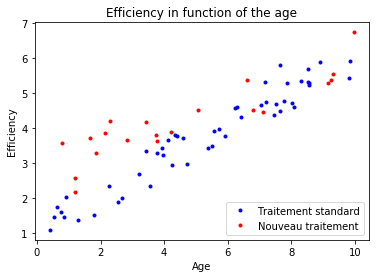

In [39]:
fig = plt.figure()

XY = dataframe_2.values

Age = XY[:,1].reshape(-1,1)
Efficiency = XY[:,2].reshape(-1,1)

Age_standard = Age[:50]
Efficiency_standard = Efficiency[:50]
Age_new = Age[50:]
Efficiency_new = Efficiency[50:]

plt.plot(Age_standard, Efficiency_standard,'b.')
plt.plot(Age_new, Efficiency_new,'r.')

plt.xlabel('Age')
plt.ylabel('Efficiency')
plt.legend(('Traitement standard','Nouveau traitement' ), loc='lower right')
plt.title('Efficiency in function of the age')
plt.show()


<div class=' alert alert-warning '>
We see that the efficiency of the motor, in botch case is improved by both treatments.
Then, it seems that the new treatment really enhances  the efficiency of new motors (in comparison with the standard treatment), but this difference is not viewable on older motors.

<div class='alert alert-info'>
<b>QUESTION 2</b> : <br>
On supposera qu'il existe une relation lineaire entre l'age du moteur et son niveau d'efficacite à un bruit Gaussien près. Utilisez la regression linéaire ainsi qu'un test statistique pour evaluer si l'impact du traitement est significatif.
</div>

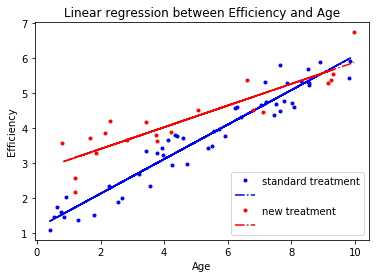

In [44]:
lin_reg_standard = LinearRegression()
lin_reg_standard.fit(Age_standard, Efficiency_standard)
lin_reg_new = LinearRegression()
lin_reg_new.fit(Age_new, Efficiency_new)


fig = plt.figure()
plt.plot(Age_standard,Efficiency_standard , 'b.')
plt.plot(Age_standard, lin_reg_standard.predict(Age_standard), 'b-.')
plt.plot(Age_new,Efficiency_new , 'r.')
plt.plot(Age_new, lin_reg_new.predict(Age_new), 'r-.')

plt.xlabel('Age')
plt.ylabel('Efficiency')
plt.legend(('standard treatment','','new treatment', ''), loc='lower right')
plt.title('Linear regression between Efficiency and Age')
plt.show()

<div class=' alert alert-warning '>
The graph confirm the answer given just below. Hence, we can do a statistic test on the regression to confirm the impact of the new treatment :
   

In [45]:
### wiiiiiillllllllll helppppp meeee